In [2]:
try:
    import pandas as pd
    pd.get_option("display.max_columns")
    import numpy as np
    import seaborn as sns
    sns.set_style('white')
    sns.set_context('talk')
    import matplotlib.pyplot as plt
    print('All packages installed successfuly')
except Exception as e:
    print(f'Exception: {e}')

All packages installed successfuly


### The dice problem_01

I have a box of dice that contains
* a 4-sided die,
* a 6-sided die,
* an 8-sided die,
* a 12-sided die.

Suppose I select a die from the box at random, roll it, and get a 6.
What is the probability that I rolled each die?

In [3]:
class dice_result:
    def __init__(self, data, dice_sides, priors_index):
        self.data = data
        self.dice_sides = dice_sides
        self.priors_index = priors_index
        self.priors = list(np.repeat([1/len(self.dice_sides)], len(self.dice_sides)))
        
    def GetLikelihood(self):
        '''
        Will give likelihood in a single update
        data = result from dice after randomly picking a dice from one of the dice_sides
        dice_sides = list of dices with max sides available
        '''
        likelihood_l = []
        for dice in self.dice_sides:
            value = 1
            for d in self.data:
                if d <= dice:
                    value *= (1/dice)
                else:
                    value *= 0
            likelihood_l.append(value)
        return likelihood_l
    
    def GetPosterior(self):
        new_df = pd.DataFrame()
        new_df['priors'] = self.priors
        new_df['likelihood'] = self.GetLikelihood()
        new_df.index = self.priors_index
        new_df['unnormalized_posterior'] = new_df['priors'] * new_df['likelihood']
        new_df['prob_data'] = [sum(new_df['unnormalized_posterior']) for num in range(len(new_df))]
        new_df['posterior'] = (new_df['priors'] * new_df['likelihood']) / new_df['prob_data']
        return new_df
    pass

In [4]:
data = [6]
dice_sides = [4,6,8,12]
priors_index = ['4-sided die', '6-sided die', '8-sided die', '12-sided die']
result = dice_result(data, dice_sides, priors_index)
result_df = result.GetPosterior()
result_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
4-sided die,0.25,0.000000,0.000000,0.09375,0.000000
6-sided die,0.25,0.166667,0.041667,0.09375,0.444444
8-sided die,0.25,0.125000,0.031250,0.09375,0.333333
12-sided die,0.25,0.083333,0.020833,0.09375,0.222222


### The dice problem_02


* Suppose I randomly keep selecting a dice and get the following results rolling in the randomly selected dice as [6,6,6,6]

In [5]:
data = [6,6,6,6]
dice_sides = [4,6,8,12]
priors_index = ['4-sided die', '6-sided die', '8-sided die', '12-sided die']
result = dice_result(data, dice_sides, priors_index)
result_df = result.GetPosterior()
result_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
4-sided die,0.25,0.000000,0.000000,0.000266,0.000000
6-sided die,0.25,0.000772,0.000193,0.000266,0.725212
8-sided die,0.25,0.000244,0.000061,0.000266,0.229462
12-sided die,0.25,0.000048,0.000012,0.000266,0.045326


* Above results that the posterior for a 6 sided die increases, since each time I am getting only 6 after rolling in, there is no other number I getting after rolling in the dice.

### The dice problem_03


* Suppose I randomly keep selecting a dice and get the following results rolling in the randomly selected dice as [6,8,7,7,5,4]

In [6]:
data = [6,8,7,7,5,4]
dice_sides = [4,6,8,12]
priors_index = ['4-sided die', '6-sided die', '8-sided die', '12-sided die']
result = dice_result(data, dice_sides, priors_index)
result_df = result.GetPosterior()
result_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
4-sided die,0.25,0.000000e+00,0.000000e+00,0.000001,0.000000
6-sided die,0.25,0.000000e+00,0.000000e+00,0.000001,0.000000
8-sided die,0.25,3.814697e-06,9.536743e-07,0.000001,0.919294
12-sided die,0.25,3.348980e-07,8.372449e-08,0.000001,0.080706


### German Tank problem

* Serial numbers in blocks of 100 were alloted
* Not all numbers used.
* Randomly captured a tank with serial number 42
* What should we believe is the number of tanks produced in the above factory

Assumption: All the tanks are equally likely to be captured and certain amount of independence 

In [21]:
data = [42]
alloted_serial_numbers = list(range(0,100))
priors_index = [f'{num}_serial_number' for num in list(range(0,100))]
result = dice_result(data, alloted_serial_numbers, priors_index)
result_df = result.GetPosterior()
result_df

,priors,likelihood,unnormalized_posterior,prob_data,posterior
0_serial_number,0.01,0.000000,0.000000,0.008744,0.000000
1_serial_number,0.01,0.000000,0.000000,0.008744,0.000000
2_serial_number,0.01,0.000000,0.000000,0.008744,0.000000
3_serial_number,0.01,0.000000,0.000000,0.008744,0.000000
4_serial_number,0.01,0.000000,0.000000,0.008744,0.000000
...,...,...,...,...,...
95_serial_number,0.01,0.010526,0.000105,0.008744,0.012038
96_serial_number,0.01,0.010417,0.000104,0.008744,0.011912
97_serial_number,0.01,0.010309,0.000103,0.008744,0.011790
98_serial_number,0.01,0.010204,0.000102,0.008744,0.011669


* Since we have randomly picked up tank number 42, the number of tanks produced in that factory is likely to be

In [22]:
prob_produced = (np.mean(result_df['posterior'] * alloted_serial_numbers))*100
print(f'The number of tanks produced in that factory is likely to be {round(prob_produced, 2)}')

The number of tanks produced in that factory is likely to be 66.33


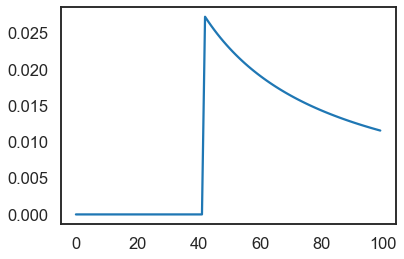

In [23]:
result_df.index = alloted_serial_numbers
result_df['posterior'].plot()

### Exercise 3: 
* Suppose we see another tank with serial number 17. What effect does this have on the posterior probabilities?

In [20]:
data = [42, 17]
alloted_serial_numbers = list(range(0,100))
priors_index = [f'{num}_serial_number' for num in list(range(0,100))]
result = dice_result(data, alloted_serial_numbers, priors_index)
result_df_updated = result.GetPosterior()
result_df_updated

,priors,likelihood,unnormalized_posterior,prob_data,posterior
0_serial_number,0.01,0.000000,0.000000,0.00014,0.000000
1_serial_number,0.01,0.000000,0.000000,0.00014,0.000000
2_serial_number,0.01,0.000000,0.000000,0.00014,0.000000
3_serial_number,0.01,0.000000,0.000000,0.00014,0.000000
4_serial_number,0.01,0.000000,0.000000,0.00014,0.000000
...,...,...,...,...,...
95_serial_number,0.01,0.000111,0.000001,0.00014,0.007889
96_serial_number,0.01,0.000109,0.000001,0.00014,0.007726
97_serial_number,0.01,0.000106,0.000001,0.00014,0.007567
98_serial_number,0.01,0.000104,0.000001,0.00014,0.007414


* Since we have randomly picked up two tanks with number 42 and 17, the number of tanks produced in that factory is likely to be

In [24]:
prob_produced = (np.mean(result_df_updated['posterior'] * alloted_serial_numbers))*100
print(f'The number of tanks produced in that factory is likely to be {round(prob_produced, 2)}')

The number of tanks produced in that factory is likely to be 62.26


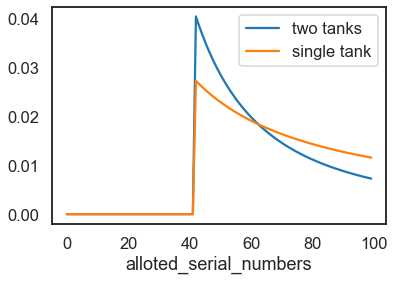

In [36]:
result_df_updated['alloted_serial_numbers'] = alloted_serial_numbers
result_df_updated.plot(x = 'alloted_serial_numbers', y = 'posterior')
result_df['posterior'].plot()
plt.legend(['two tanks', 'single tank'])
plt.show()